In [ ]:
# Loading the imported librarues for training the data
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Loading the imported modules to convert image to array
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import glob

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode')

In [ ]:
img = cv2.imread("3/three_1.jpg", 0)

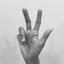

In [ ]:
cv2_imshow(img)

In [ ]:
IMG_SIZE = 120
i = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

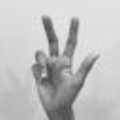

In [ ]:
cv2_imshow(i)

In [ ]:
# Defining the characters
category = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    'C Shape': 10,
    'Call me': 11,
    'Down': 12,
    'fingers_crossed': 13,
    'Fist': 14,
    'Index': 15,
    'L': 16,
    'Moved Fist': 17,
    'Moved Palm': 18,
    'Ok Super': 19,
    'Palm': 20,
    'Paper Palm': 21,
    'Peace': 22,
    'Rock Fist': 23,
    'scissor': 24,
    'Thumb': 25,
    'unknown_numbers': 26,
    'up': 27,
    'YO-YO': 28
}

In [ ]:
# Train and Test data collection jpg
IMG_SIZE = 120
train_data = []
test_data = []
for c in category:
  folder = "/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/{}".format(c)
  print(folder)
  count = 0 
  for img in glob.glob("{}/*.jpg".format(folder)):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    if count < 150:
      train_data.append([img_array, category[c]])
      count += 1
    elif count >= 150 and count < 200:
      test_data.append([img_array, category[c]])
      count += 1
    else:
      break


#png
for c in category:
  folder = "/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/{}".format(c)
  print(folder)
  count = 0 
  for img in glob.glob("{}/*.png".format(folder)):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    if count < 150:
      train_data.append([img_array, category[c]])
      count += 1
    elif count >= 150 and count < 200:
      test_data.append([img_array, category[c]])
      count += 1
    else:
      break

/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/0
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/1
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/2
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/3
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/4
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/5
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/6
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/7
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/8
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/9
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/C Shape
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/Call me
/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/Do

In [ ]:
import pandas as pd

In [ ]:
# Create the pandas DataFrame train and test
df = pd.DataFrame(train_data, columns = ['image', 'category'])
  
# print dataframe.
df.to_csv("/content/drive/MyDrive/project/train_data.csv")

In [ ]:
# Create the pandas DataFrame train and test
df = pd.DataFrame(test_data, columns = ['image', 'category'])
  
# print dataframe.
df.to_csv("/content/drive/MyDrive/project/test_data.csv")

In [ ]:
# random shuffling of train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
for im in train_data:
  X_train.append(im[0])
  y_train.append(im[1])
for im in test_data:
  X_test.append(im[0])
  y_test.append(im[1])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4650, 120, 120)
(4650,)
(1550, 120, 120)
(1550,)


In [ ]:
X_train[3]

array([[225, 231, 244, ..., 104, 109, 112],
       [225, 231, 244, ..., 116, 119, 120],
       [225, 231, 245, ..., 119, 123, 124],
       ...,
       [101, 101, 101, ...,  53,  50,  49],
       [102, 102, 101, ...,  54,  52,  52],
       [101, 101, 101, ...,  53,  52,  51]], dtype=uint8)

In [ ]:
#converting int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train[3]

array([[225., 231., 244., ..., 104., 109., 112.],
       [225., 231., 244., ..., 116., 119., 120.],
       [225., 231., 245., ..., 119., 123., 124.],
       ...,
       [101., 101., 101., ...,  53.,  50.,  49.],
       [102., 102., 101., ...,  54.,  52.,  52.],
       [101., 101., 101., ...,  53.,  52.,  51.]], dtype=float32)

In [ ]:
y_train = np.array(y_train).reshape(len(y_train),1)
y_train

array([[ 7],
       [14],
       [16],
       ...,
       [15],
       [24],
       [24]])

In [ ]:
y_test = np.array(y_test).reshape(len(y_test),1)
y_test

array([[13],
       [24],
       [20],
       ...,
       [18],
       [16],
       [18]])

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]
num_classes

29

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train.reshape((len(X_train), 120, 120, 1))
X_train /= 255

In [ ]:
X_test = X_test.reshape((len(X_test), 120, 120, 1))
X_test /= 255

In [ ]:
# model=Sequential()
# model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding="same", input_shape=(120, 120,1))) 
# model.add(Dropout(0.5))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu')) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model=Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 120,1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

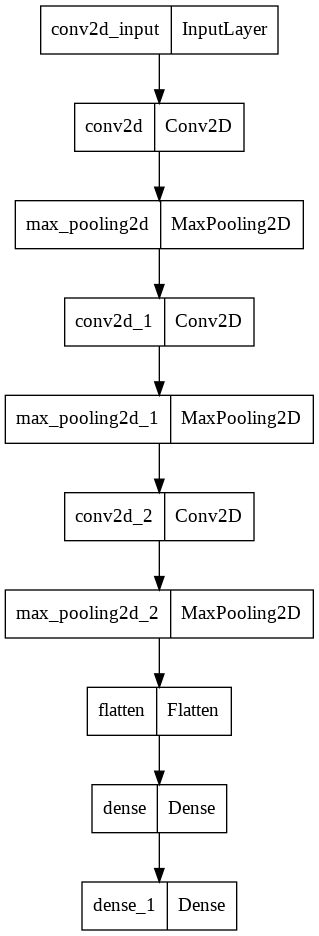

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
37/37 [==============================] - 23s 610ms/step - loss: 2.4259 - accuracy: 0.3013 - val_loss: 1.5321 - val_accuracy: 0.5471
Epoch 2/10
37/37 [==============================] - 22s 603ms/step - loss: 1.0763 - accuracy: 0.6581 - val_loss: 1.1496 - val_accuracy: 0.6406
Epoch 3/10
37/37 [==============================] - 22s 597ms/step - loss: 0.6784 - accuracy: 0.7824 - val_loss: 0.9037 - val_accuracy: 0.7232
Epoch 4/10
37/37 [==============================] - 22s 590ms/step - loss: 0.4807 - accuracy: 0.8482 - val_loss: 0.8520 - val_accuracy: 0.7432
Epoch 5/10
37/37 [==============================] - 22s 591ms/step - loss: 0.3534 - accuracy: 0.8860 - val_loss: 0.9408 - val_accuracy: 0.7381
Epoch 6/10
37/37 [==============================] - 22s 584ms/step - loss: 0.3096 - accuracy: 0.8985 - val_loss: 0.8269 - val_accuracy: 0.7884
Epoch 7/10
37/37 [==============================] - 22s 588ms/step - loss: 0.2202 - accuracy: 0.9357 - val_loss: 0.9110 - val_accuracy: 0.7858

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.90%


In [ ]:
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 795 kB 4.0 MB/s 


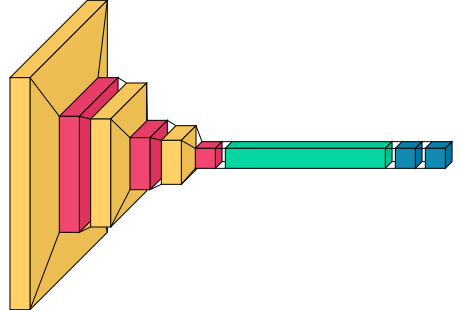

In [ ]:
visualkeras.layered_view(model)

In [ ]:
IMG_SIZE = 120

test_image = "/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/9/nine_1480.jpg"
ia = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))
    

In [ ]:
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predict = predict.astype('float32')
predict /= 255

In [ ]:
np.argmax(model.predict(predict.reshape(-1, 120, 120, 1)))

9

In [ ]:
IMG_SIZE = 120
test_image = "/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/up/9317.jpg"
ia = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))

In [ ]:
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predict = predict.astype('float32')
predict /= 255

In [ ]:
np.argmax(model.predict(predict.reshape(-1, 120, 120, 1)))

27

In [ ]:
category = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    'C Shape': 10,
    'Call me': 11,
    'Down': 12,
    'fingers_crossed': 13,
    'Fist': 14,
    'Index': 15,
    'L': 16,
    'Moved Fist': 17,
    'Moved Palm': 18,
    'Ok Super': 19,
    'Palm': 20,
    'Paper Palm': 21,
    'Peace': 22,
    'Rock Fist': 23,
    'scissor': 24,
    'Thumb': 25,
    'unknown_numbers': 26,
    'up': 27,
    'YO-YO': 28
}

In [ ]:
IMG_SIZE = 120
test_image = "/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/scissor/610.jpg"
ia = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
ia = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))
predict = np.array(ia).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predict = predict.astype('float32')
predict /= 255
np.argmax(model.predict(predict.reshape(-1, 120, 120, 1)))

24

In [ ]:
#Saving the model
model.save("/content/drive/MyDrive/project/Hand Gesture Recognition Database Leapmode/model.h5")